In [1]:
import sys
sys.path.append('../')

In [2]:
# 策略： 银行股票，市值前十，市净率低于0.6买入。首次买40%仓位，每跌10%补仓20%
import data.Stock as st
import pandas as pd
import  numpy as np
import strategy.base as strat
import matplotlib.pyplot as plt

提示：当前环境 pandas 版本高于 0.25，get_price 与 get_fundamentals_continuously 接口 panel 参数将固定为 False
注意：0.25 以上版本 pandas 不支持 panel，如使用该数据结构和相关函数请注意修改
auth success 


In [16]:
def ba_strategy(data, pb_low=0.6, pb_high=1.3):
    '''

    :param data: df必须包含收盘价
    :param short_window:
    :param long_window:
    :return:
    '''

    # 是否存在市净率、收盘价
    columns = data.columns.values
    if  'close' not in data.columns:
        print('feature \'close\' should in ')
        return
    if  'pb_ratio' not in columns:
        print('feature \'pb_ratio\' should in ')
        return

    # 计算技术指标
    data = pd.DataFrame(data)

    # 生成信号： pb<0.6买入  ，大于0.1,卖出
    data['buy_signal'] = np.where(data['pb_ratio'] < pb_low, 1, 0)
    data['sell_signal'] = np.where(data['pb_ratio'] > pb_high, -1, 0)

    # 过滤信号
    data = strat.compose_signal(data)

    # 删除多余
    data.drop(labels=['buy_signal', 'sell_signal'], axis=1)
    
    # 如果买卖总次数大于2，计算收益
    if len(data[data['signal'] != 0 ])>2:
        # 计算单次收益
        data= strat.calculate_prof_pct(data) 
        # 计算累计收益
        data = strat.calculate_cum_prof(data)
        
    else :
        data = None

    return data

In [4]:
# 目标股票代码
stocks = st.get_stock_list_all()
stock_list = list(stocks[stocks['display_name'].str.contains('银行')].index)
# 容器
all_dfprice = {}
# 目标收盘价以及PE指标
for code in stock_list:
    print(code)
    dfprice = st.get_single_price(code, 'daily', '2015-01-01', '2021-04-05')
    for date in dfprice.index:
        cc = st.get_single_valuation(code, date, statDate=None)
        if len(cc)>0:
            dfprice.loc[date, 'pb_ratio'] = cc.pb_ratio[0]
            dfprice.loc[date, 'market_cap'] = cc.market_cap[0]
    dfprice.to_csv(code+'.csv')
    all_dfprice[code] = dfprice

000001.XSHE
002142.XSHE
002807.XSHE
002936.XSHE
002948.XSHE
002966.XSHE
600000.XSHG
600015.XSHG
600016.XSHG
600036.XSHG
600908.XSHG
600919.XSHG
600926.XSHG
600928.XSHG
601009.XSHG
601128.XSHG
601166.XSHG
601169.XSHG
601187.XSHG
601229.XSHG
601288.XSHG
601328.XSHG
601398.XSHG
601577.XSHG
601658.XSHG
601818.XSHG
601838.XSHG
601860.XSHG
601916.XSHG
601939.XSHG
601963.XSHG
601988.XSHG
601997.XSHG
601998.XSHG
603323.XSHG


In [5]:
if len(st.get_single_valuation(code, date, statDate=None))>0:
    print(True)

True


In [6]:
all_dfprice

{'000001.XSHE':              open  close   high    low       volume         money  pb_ratio  \
 2015-01-05  10.24  10.26  10.43   9.99  446489383.0  4.565388e+09    1.4442   
 2015-01-06  10.15  10.11  10.50   9.96  338159640.0  3.453446e+09    1.4225   
 2015-01-07   9.97   9.92  10.14   9.80  265374121.0  2.634796e+09    1.3955   
 2015-01-08   9.93   9.58   9.97   9.55  219732012.0  2.128003e+09    1.3486   
 2015-01-09   9.55   9.66  10.17   9.42  391555169.0  3.835378e+09    1.3594   
 2015-01-12   9.53   9.46   9.64   9.29  242455266.0  2.293105e+09    1.3315   
 2015-01-13   9.39   9.40   9.55   9.36  127507088.0  1.204987e+09    1.3234   
 2015-01-14   9.47   9.49   9.74   9.42  197147991.0  1.889297e+09    1.3351   
 2015-01-15   9.51   9.83   9.83   9.42  193892038.0  1.868796e+09    1.3838   
 2015-01-16   9.87   9.85  10.01   9.73  242854160.0  2.403346e+09    1.3856   
 2015-01-19   8.98   8.86   9.33   8.86  333586514.0  3.016203e+09    1.2467   
 2015-01-20   8.86   8.86

In [7]:
stocks

display_name    name start_date   end_date   type
000001.XSHE         平安银行    PAYH 1991-04-03 2200-01-01  stock
000002.XSHE          万科A     WKA 1991-01-29 2200-01-01  stock
000004.XSHE         国华网安    GHWA 1990-12-01 2200-01-01  stock
000005.XSHE         世纪星源    SJXY 1990-12-10 2200-01-01  stock
000006.XSHE         深振业A    SZYA 1992-04-27 2200-01-01  stock
000007.XSHE          全新好     QXH 1992-04-13 2200-01-01  stock
000008.XSHE         神州高铁    SZGT 1992-05-07 2200-01-01  stock
000009.XSHE         中国宝安    ZGBA 1991-06-25 2200-01-01  stock
000010.XSHE         美丽生态    MLST 1995-10-27 2200-01-01  stock
000011.XSHE         深物业A    SWYA 1992-03-30 2200-01-01  stock
000012.XSHE          南玻A     NBA 1992-02-28 2200-01-01  stock
000014.XSHE         沙河股份    SHGF 1992-06-02 2200-01-01  stock
000016.XSHE         深康佳A    SKJA 1992-03-27 2200-01-01  stock
000017.XSHE       *ST中华A  *STZHA 1992-03-31 2200-01-01  stock
000018.XSHE         神城A退    SCAT 1992-06-16 2020-01-06  stock
000019.XSHE         深粮控股    SLKG 1992-10-12 2200-01-01  stock
000020.XSHE         深华发A    SHFA 1992-04-28 2200-01-01  stock
000021.XSHE          深科技     SKJ 1994-02-02 2200-01-01  stock
000022.XSHE         深赤湾A    SCWA 1993-05-05 2018-12-25  stock
000023.XSHE         深天地A    STDA 1993-04-29 2200-01-01  stock
000024.XSHE         招商地产    ZSDC 1993-06-07 2015-12-29  stock
000025.XSHE          特力A     TLA 1993-06-21 2200-01-01  stock
000026.XSHE          飞亚达     FYD 1993-06-03 2200-01-01  stock
000027.XSHE         深圳能源    SZNY 1993-09-03 2200-01-01  stock
000028.XSHE         国药一致    GYYZ 1993-08-09 2200-01-01  stock
000029.XSHE         深深房A    SSFA 1993-09-15 2200-01-01  stock
000030.XSHE         富奥股份    FAGF 1993-09-29 2200-01-01  stock
000031.XSHE          大悦城     DYC 1993-10-08 2200-01-01  stock
000032.XSHE         深桑达A    SSDA 1993-10-28 2200-01-01  stock
000033.XSHE          新都退     XDT 1994-01-03 2017-07-07  stock
000034.XSHE         神州数码    SZSM 1994-05-09 2200-01-01  stock
000035.XSHE         中国天楹    ZGTY 1994-04-08 2200-01-01  stock
000036.XSHE         华联控股    HLKG 1994-06-17 2200-01-01  stock
000037.XSHE         深南电A    SNDA 1994-07-01 2200-01-01  stock
000038.XSHE          深大通     SDT 1994-08-08 2200-01-01  stock
000039.XSHE         中集集团    ZJJT 1994-04-08 2200-01-01  stock
000040.XSHE         东旭蓝天    DXLT 1994-08-08 2200-01-01  stock
000042.XSHE         中洲控股    ZZKG 1994-09-21 2200-01-01  stock
000043.XSHE         中航善达    ZHSD 1994-09-28 2019-12-13  stock
000045.XSHE         深纺织A    SFZA 1994-08-15 2200-01-01  stock
000046.XSHE         泛海控股    FHKG 1994-09-12 2200-01-01  stock
000048.XSHE         京基智农    JJZN 1994-11-01 2200-01-01  stock
000049.XSHE         德赛电池    DSDC 1995-03-20 2200-01-01  stock
000050.XSHE         深天马A    STMA 1995-03-15 2200-01-01  stock
000055.XSHE         方大集团    FDJT 1996-04-15 2200-01-01  stock
000056.XSHE         皇庭国际    HTGJ 1996-07-08 2200-01-01  stock
000058.XSHE          深赛格     SSG 1996-12-26 2200-01-01  stock
000059.XSHE         华锦股份    HJGF 1997-01-30 2200-01-01  stock
000060.XSHE         中金岭南    ZJLN 1997-01-23 2200-01-01  stock
000061.XSHE          农产品     NCP 1997-01-10 2200-01-01  stock
000062.XSHE         深圳华强    SZHQ 1997-01-30 2200-01-01  stock
000063.XSHE         中兴通讯    ZXTX 1997-11-18 2200-01-01  stock
000065.XSHE         北方国际    BFGJ 1998-06-05 2200-01-01  stock
000066.XSHE         中国长城    ZGCC 1997-06-26 2200-01-01  stock
000068.XSHE         华控赛格    HKSG 1997-06-11 2200-01-01  stock
000069.XSHE         华侨城A    HQCA 1997-09-10 2200-01-01  stock
000070.XSHE         特发信息    TFXX 2000-05-11 2200-01-01  stock
000078.XSHE         海王生物    HWSW 1998-12-18 2200-01-01  stock
000088.XSHE          盐田港     YTG 1997-07-28 2200-01-01  stock
000089.XSHE         深圳机场    SZJC 1998-04-20 2200-01-01  stock
000090.XSHE         天健集团    TJJT 1999-07-21 2200-01-01  stock
000096.XSHE         广聚能源    GJNY 2000-07-24 2200-01-01  stock
000099.XSHE         中信海直    ZXHZ 2000-07-31 2200-01-01  stock
000100.XSHE        TCL科技   TCLKJ 2004-01-30 

In [17]:
dfobj = pd.DataFrame(index = all_dfprice.keys(),columns=['cum_profit','market_cap'])
dfobj.loc[:,'display_name'] = stocks.loc[dfobj.index,'display_name']

for i in all_dfprice:
    dfprice = all_dfprice[i]
    try:
        data = ba_strategy(dfprice)
        if data is not None:
            dfobj.loc[i,'cum_profit'] = data['cum_profit'].iloc[-1]
    except:
        pass
    dfobj.loc[i,'market_cap']  = dfprice['market_cap'].iloc[-1]

In [18]:
dfobj = dfobj.sort_values('market_cap')

In [19]:
dfobj


cum_profit market_cap display_name
603323.XSHG  0.0187793    85.6458         苏农银行
002807.XSHE  0.0310078    92.5274         江阴银行
600908.XSHG        NaN    119.518         无锡银行
601860.XSHG   0.213793    140.213         紫金银行
601128.XSHG   0.458111     203.92         常熟银行
600928.XSHG   0.028169    230.222         西安银行
002948.XSHE   0.153169    230.445         青岛银行
601187.XSHG  0.0148778    247.814         厦门银行
002966.XSHE -0.0370705    255.333         苏州银行
601997.XSHG        NaN    261.947         贵阳银行
002936.XSHE        NaN    282.531         郑州银行
601838.XSHG        NaN    395.541         成都银行
601963.XSHG        NaN     406.17         重庆银行
601577.XSHG  0.0250464    410.601         长沙银行
601916.XSHG        NaN    857.129         浙商银行
600919.XSHG  0.0580297    951.163         江苏银行
600926.XSHG   0.466946    981.448         杭州银行
600015.XSHG  0.0675204    983.244         华夏银行
601009.XSHG   0.646681    986.692         南京银行
601169.XSHG  0.0852273    1010.63         北京银行
601229.XSHG -0.0105597    1230.29         上海银行
601818.XSHG  0.0942408    2172.08         光大银行
600016.XSHG  -0.156727    2184.74         民生银行
002142.XSHE   0.138826    2340.12         宁波银行
601998.XSHG -0.0683507    2613.12         中信银行
600000.XSHG   0.142717    3158.29         浦发银行
601328.XSHG -0.0632184    3601.74         交通银行
000001.XSHE   0.906433    4172.27         平安银行
601166.XSHG  0.0425056    4857.01         兴业银行
601658.XSHG        NaN    5238.17         邮储银行
601988.XSHG   0.120235    9744.24         中国银行
601288.XSHG  0.0618557    11724.4         农业银行
600036.XSHG    1.20263    12849.5         招商银行
601939.XSHG   0.467557    17900.8         建设银行
601398.XSHG   0.534118    19317.2         工商银行

平安银行
兴业银行
邮储银行
中国银行
农业银行
招商银行
建设银行
工商银行


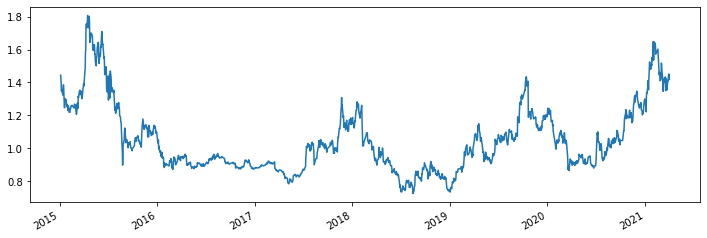

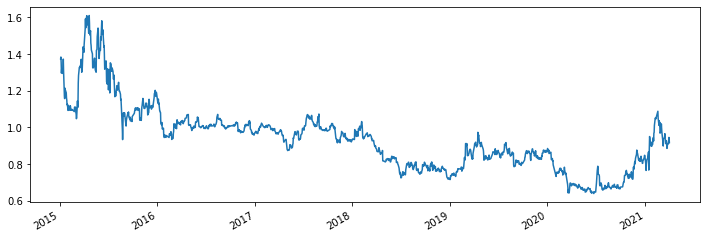

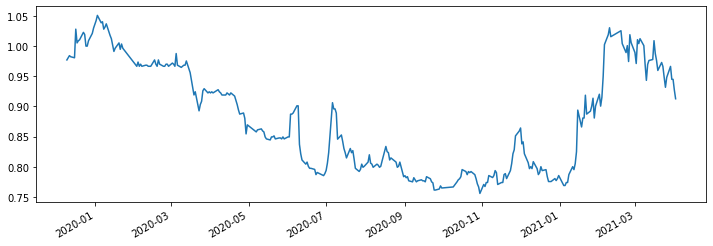

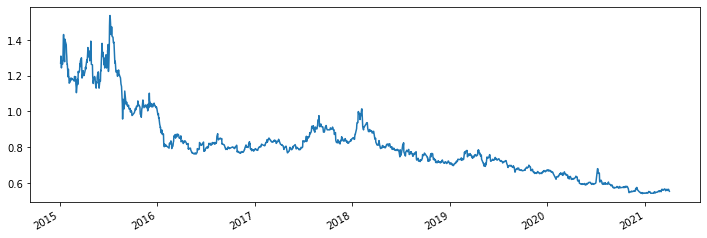

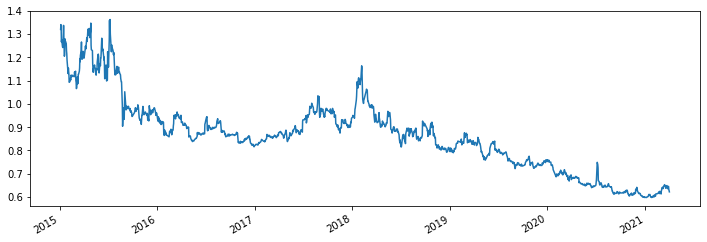

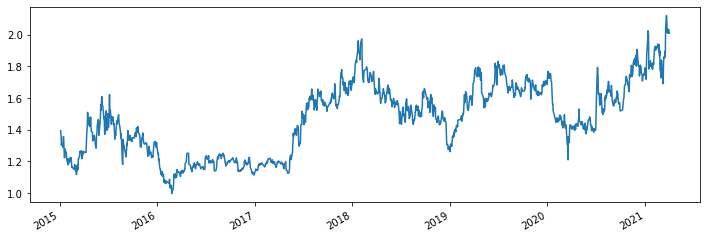

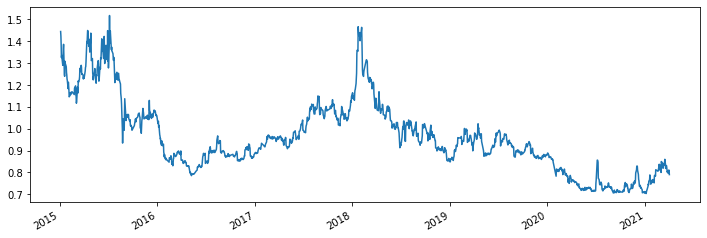

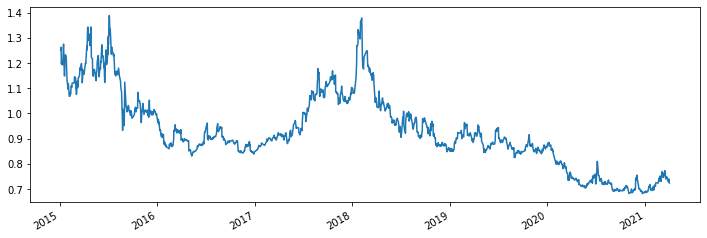

In [21]:
for code in dfobj.iloc[-8:,:].index:
    plt.figure()
    print(dfobj.loc[code,'display_name'])
    all_dfprice[code].pb_ratio.plot(figsize=(12,4),label=dfobj.loc[code,'display_name'])

In [11]:
all_dfprice[code]

open  close  high   low        volume         money  pb_ratio  \
2015-01-05  3.73   3.83  3.90  3.71  1.804562e+09  6.849226e+09    1.2529   
2015-01-06  3.78   3.86  4.06  3.75  1.978577e+09  7.672746e+09    1.2628   
2015-01-07  3.78   3.81  3.86  3.75  1.070960e+09  4.076794e+09    1.2480   
2015-01-08  3.82   3.66  3.84  3.63  9.143348e+08  3.396521e+09    1.1960   
2015-01-09  3.65   3.69  3.90  3.59  1.310089e+09  4.905937e+09    1.2084   
2015-01-12  3.67   3.65  3.72  3.57  7.227455e+08  2.638840e+09    1.1935   
2015-01-13  3.63   3.65  3.68  3.62  3.547766e+08  1.292589e+09    1.1935   
2015-01-14  3.66   3.70  3.76  3.66  7.130466e+08  2.645523e+09    1.2109   
2015-01-15  3.70   3.85  3.88  3.67  8.233826e+08  3.093536e+09    1.2604   
2015-01-16  3.88   3.90  3.99  3.86  1.039591e+09  4.073206e+09    1.2752   
2015-01-19  3.63   3.51  3.73  3.51  1.311249e+09  4.725214e+09    1.1489   
2015-01-20  3.53   3.51  3.59  3.43  8.560326e+08  3.017984e+09    1.1489   
2015-01-21  3.54   3.72  3.77  3.51  1.047504e+09  3.797531e+09    1.2183   
2015-01-22  3.72   3.69  3.73  3.63  7.526334e+08  2.770807e+09    1.2084   
2015-01-23  3.72   3.77  3.88  3.72  1.231278e+09  4.664106e+09    1.2331   
2015-01-26  3.76   3.73  3.78  3.66  7.037400e+08  2.614901e+09    1.2208   
2015-01-27  3.73   3.62  3.73  3.55  9.302578e+08  3.376430e+09    1.1836   
2015-01-28  3.58   3.55  3.61  3.52  7.283729e+08  2.591289e+09    1.1613   
2015-01-29  3.49   3.45  3.51  3.43  7.630413e+08  2.643394e+09    1.1291   
2015-01-30  3.47   3.44  3.50  3.41  5.541472e+08  1.912727e+09    1.1242   
2015-02-02  3.39   3.34  3.39  3.32  6.712012e+08  2.250690e+09    1.0961   
2015-02-03  3.37   3.41  3.41  3.31  7.419678e+08  2.491369e+09    1.1184   
2015-02-04  3.41   3.34  3.43  3.33  6.135575e+08  2.074140e+09    1.0961   
2015-02-05  3.47   3.33  3.49  3.32  1.005386e+09  3.426933e+09    1.0936   
2015-02-06  3.31   3.25  3.32  3.23  6.655059e+08  2.182155e+09    1.0687   
2015-02-09  3.23   3.25  3.28  3.21  6.282934e+08  2.036829e+09    1.0687   
2015-02-10  3.25   3.30  3.30  3.23  5.959223e+08  1.950965e+09    1.0836   
2015-02-11  3.26   3.28  3.30  3.25  3.915202e+08  1.282182e+09    1.0762   
2015-02-12  3.27   3.28  3.29  3.24  3.928816e+08  1.282864e+09    1.0835   
2015-02-13  3.30   3.36  3.38  3.29  6.374827e+08  2.127027e+09    1.1085   
2015-02-16  3.35   3.35  3.36  3.32  3.132651e+08  1.047007e+09    1.1035   
2015-02-17  3.35   3.40  3.42  3.35  4.301575e+08  1.460312e+09    1.1210   
2015-02-25  3.40   3.40  3.43  3.38  4.176422e+08  1.421512e+09    1.1210   
2015-02-26  3.38   3.47  3.49  3.38  6.621354e+08  2.273319e+09    1.1459   
2015-02-27  3.48   3.47  3.50  3.44  5.035833e+08  1.747248e+09    1.1434   
2015-03-02  3.47   3.46  3.49  3.44  4.059117e+08  1.403423e+09    1.1409   
2015-03-03  3.44   3.33  3.44  3.33  5.812507e+08  1.964965e+09    1.0985   
2015-03-04  3.33   3.32  3.35  3.30  3.282828e+08  1.091708e+09    1.0935   
2015-03-05  3.29   3.26  3.31  3.24  3.902045e+08  1.275159e+09    1.0760   
2015-03-06  3.27   3.28  3.30  3.25  2.900537e+08  9.512920e+08    1.0835   
2015-03-09  3.30   3.42  3.45  3.26  6.962177e+08  2.344408e+09    1.1285   
2015-03-10  3.38   3.35  3.39  3.34  4.521725e+08  1.520248e+09    1.1035   
2015-03-11  3.35   3.38  3.42  3.35  4.214066e+08  1.427555e+09    1.1135   
2015-03-12  3.42   3.46  3.52  3.40  8.791344e+08  3.044381e+09    1.1409   
2015-03-13  3.49   3.46  3.53  3.43  6.683692e+08  2.329716e+09    1.1409   
2015-03-16  3.47   3.48  3.50  3.44  5.175245e+08  1.797079e+09    1.1484   
2015-03-17  3.50   3.50  3.51  3.48  6.005505e+08  2.099251e+09    1.1559   
2015-03-18  3.50   3.58  3.59  3.50  8.202795e+08  2.905011e+09    1.1809   
2015-03-19  3.58   3.55  3.59  3.53  6.843093e+08  2.435866e+09    1.1709   
2015-03-20  3.54   3.57  3.62  3.52  7.880929e+08  2.812444e+09    1.1784   
2015-03-23  3.62   3.62  3.64  3.59  7.067905e+08  2.555339e+09    1.1934   
2015-03-